## Arquivo para trabalho do techchallenge

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline

In [436]:
dataset = pd.read_csv('./archive/insurance.csv')
print(dataset.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [437]:
print(dataset.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [438]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [439]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [440]:
duplicated_rows = dataset.duplicated()
dataset[duplicated_rows]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [441]:
# Remoção de colunas duplicadas
dataset = dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## Quais são a frequência dos valores do meu dataset?

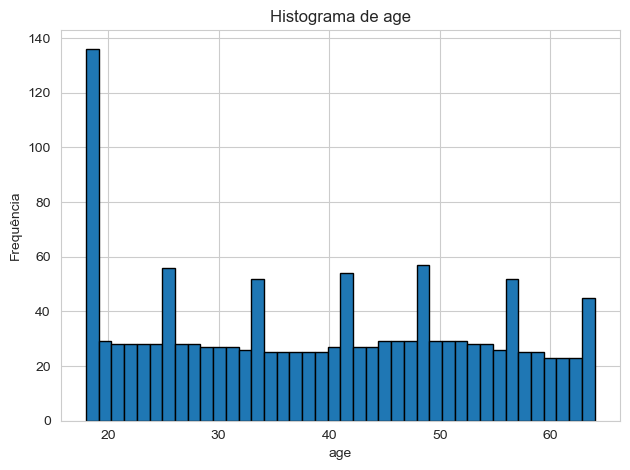

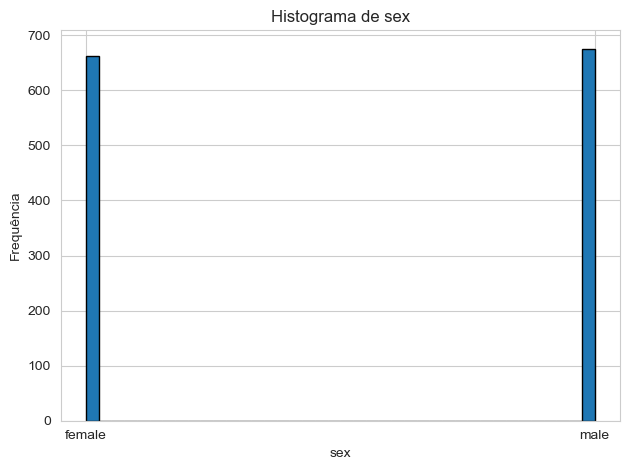

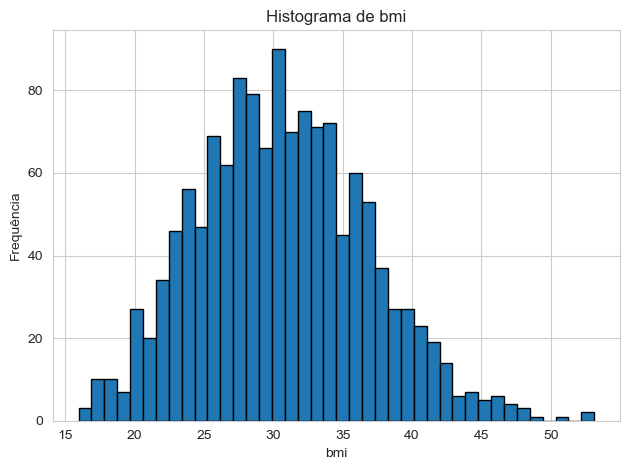

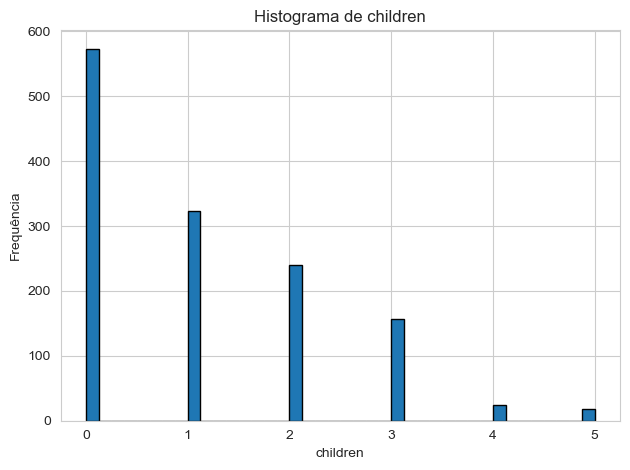

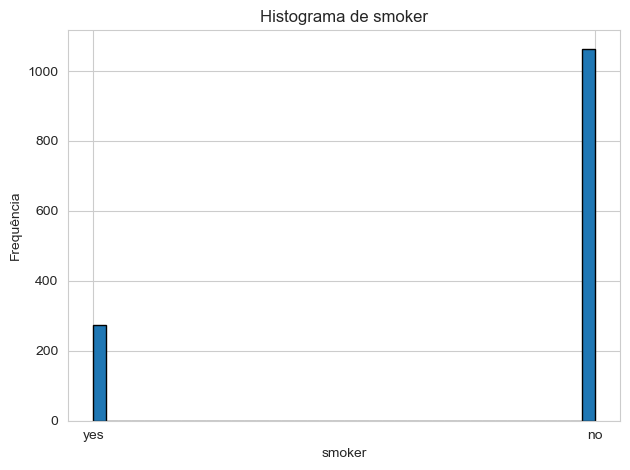

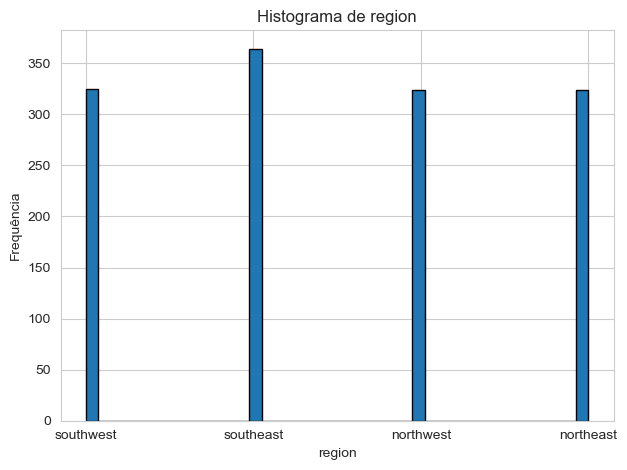

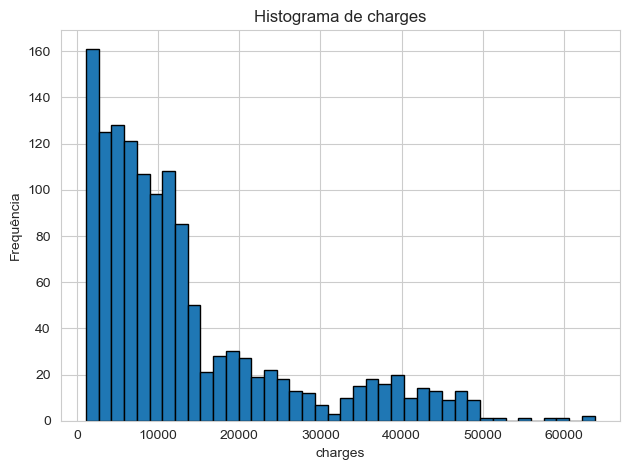

In [442]:
# Histogramas para colunas numéricas
columns = dataset.columns
for column in columns:
    plt.hist(dataset[column], bins=40, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()


A análise exploratória dos dados revelou características relevantes sobre as cobranças e o perfil dos segurados. Valores menores de cobrança são predominantes, sugerindo que os montantes mais elevados, especialmente na faixa de 20 a 30 mil, podem ser outliers a serem investigados.

Em relação à idade, a distribuição mostra uma concentração significativa de indivíduos com até 20 anos, enquanto as demais faixas etárias apresentam uma distribuição mais achatada. O Índice de Massa Corporal (IMC) exibe uma distribuição quase simétrica em torno da média, embora a presença de outliers próximos de 50 seja provável.

A maioria das pessoas no dataset não possui filhos, e a quantidade de filhos diminui linearmente até cinco. Por fim, o conjunto de dados contém uma quantidade considerável de não fumantes e uma distribuição equilibrada entre as regiões sudoeste, sudeste, noroeste e nordeste.

## Qual a distribuição entre fumantes entre homens e mulheres?

In [443]:
gender_smoker_counts = dataset.groupby(['sex', 'smoker']).size()
print(gender_smoker_counts)

sex     smoker
female  no        547
        yes       115
male    no        516
        yes       159
dtype: int64


A análise da distribuição por sexo e hábito de fumar revela que, de maneira geral, há um número significativamente maior de não fumantes em comparação com fumantes, tanto entre mulheres quanto entre homens. Especificamente, entre as mulheres, 547 são não fumantes e 115 são fumantes. Para os homens, 517 são não fumantes e 159 são fumantes. Embora haja mais mulheres não fumantes que homens não fumantes (547 vs 517), a proporção de fumantes em relação ao total de cada sexo é maior entre os homens (159 fumantes vs 517 não fumantes) do que entre as mulheres (115 fumantes vs 547 não fumantes).

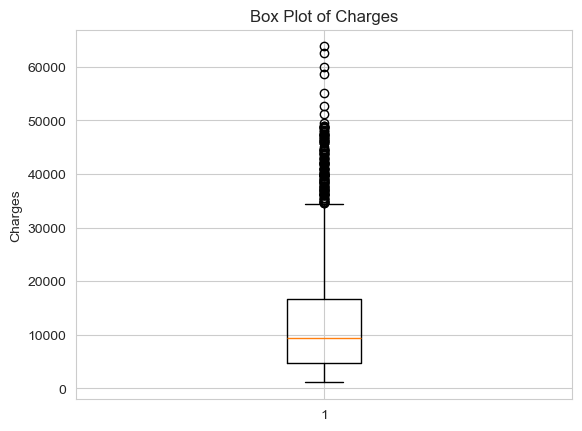

In [444]:
plt.boxplot(dataset['charges'])  # Drop NaN values to avoid errors
plt.title('Box Plot of Charges')
plt.ylabel('Charges')
plt.show()

O box plot das cobranças (Charges) demonstra a análise prévia do histograma, evidenciando uma grande quantidade de outliers nos valores superiores. A caixa principal do box plot, que representa a maior parte dos dados (entre o primeiro e o terceiro quartil), está concentrada em valores de cobrança relativamente baixos, reforçando a tendência de maior densidade de dados para menores valores. Acima do limite superior, a dispersão de pontos isolados, que se estende para além de 60.000, indica claramente a presença de diversas cobranças significativamente mais altas do que a maioria das cobranças.

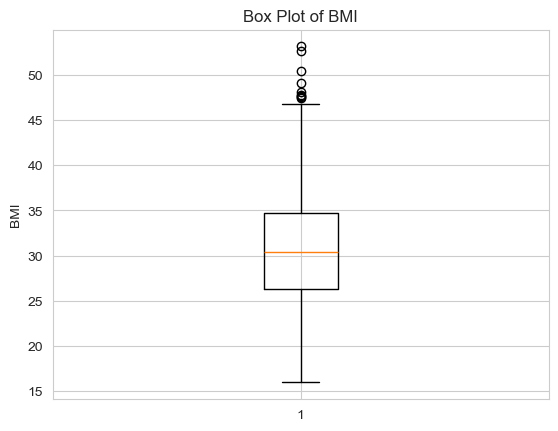

In [445]:
plt.boxplot(dataset['bmi'].dropna())  # Drop NaN values to avoid errors
plt.title('Box Plot of BMI')
plt.ylabel('BMI')
plt.show()

O box plot do Índice de Massa Corporal (IMC) reforça a observação anterior de uma distribuição de valores tendendo à média. A caixa central, representando a maior parte dos dados, demonstra que a concentração dos valores de IMC ocorre em uma faixa bem definida. No entanto, a presença de diversos pontos isolados acima do limite superior, especialmente próximos e acima de 50, confirma a existência de outliers na cauda superior da distribuição. 

## Qual a variação da cobrança de acordo com a idade?

age_category
18-25     9037.953231
26-35    10352.392526
36-45    13134.168693
46-55    15853.927878
56-64    18037.050766
Name: charges, dtype: float64


C:\Users\thiag\AppData\Local\Temp\ipykernel_41488\1453652552.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_charges_by_age = dataset.groupby('age_category')['charges'].mean()


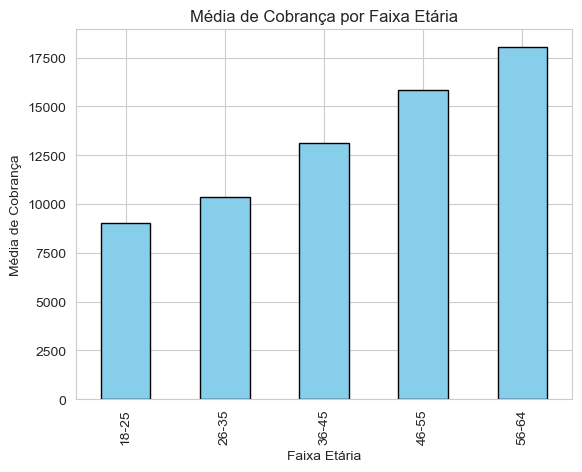

In [446]:
# Criar categorias de idade entre 18 e 64
bins = [18, 25, 35, 45, 55, 64]  # Faixas etárias
labels = ['18-25', '26-35', '36-45', '46-55', '56-64']  # Rótulos para as categorias
dataset['age_category'] = pd.cut(dataset['age'], bins=bins, labels=labels, right=False)

# Calcular a média de cobrança para cada categoria de idade
average_charges_by_age = dataset.groupby('age_category')['charges'].mean()

# Exibir os resultados
print(average_charges_by_age)

# Opcional: Visualizar os resultados com um gráfico de barras
average_charges_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Média de Cobrança por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Cobrança')
plt.show()

A média de cobrança apresenta uma clara tendência crescente conforme a faixa etária avança. Indivíduos na faixa de 18-25 anos registram as menores médias de cobrança, em torno de 9.000. Subsequentemente, observa-se um aumento consistente: a faixa de 26-35 anos tem uma média um pouco acima de 10.000, seguida por 36-45 anos, que ultrapassa 12.500. A progressão continua para a faixa de 46-55 anos, que se aproxima de 16.000, culminando na faixa de 56-64 anos, onde a média de cobrança atinge seu pico, superando 17.500. Este padrão sugere que a idade é um fator relevante na determinação dos valores de cobrança.

## Relação do valor cobrado em relação ao gênero, bmi e quantidade de crianças e se fuma ou não

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64


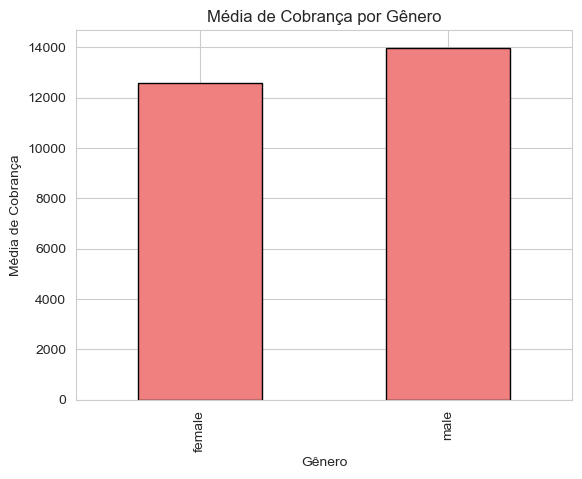

In [447]:
average_charges_by_gender = dataset.groupby('sex')['charges'].mean()

# Exibir os resultados
print(average_charges_by_gender)

# Opcional: Visualizar os resultados com um gráfico de barras
average_charges_by_gender.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Média de Cobrança por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Cobrança')
plt.show()

O gráfico da "Média de Cobrança por Gênero" indica que homens apresentam uma média de cobrança ligeiramente superior em comparação com as mulheres. Enquanto a média de cobrança para o gênero feminino se situa um pouco acima de 12.500, para o gênero masculino, a média se aproxima de 14.000. Essa diferença, embora não seja extremamente acentuada, sugere que o gênero pode ter alguma influência nos valores médios das cobranças.

C:\Users\thiag\AppData\Local\Temp\ipykernel_41488\1142152934.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_charges_by_bmi = dataset.groupby('bmi_category')['charges'].mean()


bmi_category
Abaixo do Peso      8852.200585
Peso Normal        10409.337709
Sobrepeso          10987.509891
Obesidade          15392.620486
Obesidade Grave    16784.615546
Name: charges, dtype: float64


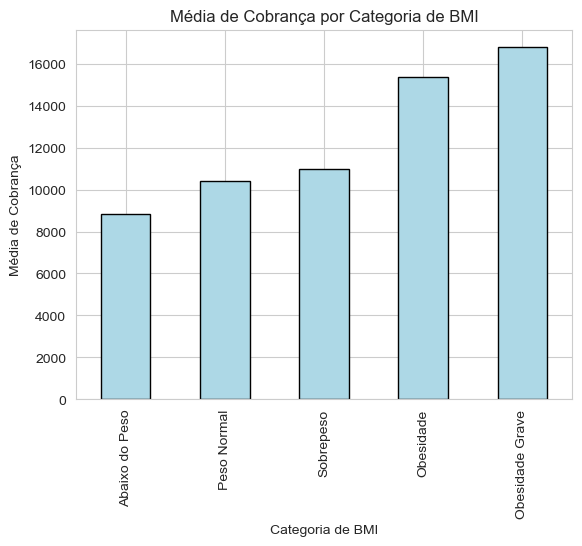

In [448]:
# Criar categorias de BMI
bmi_bins = [0, 18.5, 25, 30, 40, 100]  # Faixas de BMI
bmi_labels = ['Abaixo do Peso', 'Peso Normal', 'Sobrepeso', 'Obesidade', 'Obesidade Grave']
dataset['bmi_category'] = pd.cut(dataset['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Calcular a média de cobrança por categoria de BMI
average_charges_by_bmi = dataset.groupby('bmi_category')['charges'].mean()

# Exibir os resultados
print(average_charges_by_bmi)

# Opcional: Visualizar os resultados com um gráfico de barras
average_charges_by_bmi.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Média de Cobrança por Categoria de BMI')
plt.xlabel('Categoria de BMI')
plt.ylabel('Média de Cobrança')
plt.show()

O gráfico "Média de Cobrança por Categoria de IMC" revela uma relação direta entre o Índice de Massa Corporal (IMC) e a média de cobrança. Observa-se uma clara tendência de aumento nas cobranças conforme a categoria de IMC se eleva. Indivíduos na categoria "Abaixo do Peso" apresentam a menor média de cobrança, pouco abaixo de 9.000. Essa média cresce progressivamente para as categorias "Peso Normal" (um pouco acima de 10.000) e "Sobrepeso" (cerca de 11.000). O aumento se torna mais pronunciado nas categorias de "Obesidade" (próximo de 15.500) e atinge o pico na "Obesidade Grave", com a maior média de cobrança, superando 16.500. Isso sugere fortemente que o IMC é um fator significativo que influencia os custos de cobrança.

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64


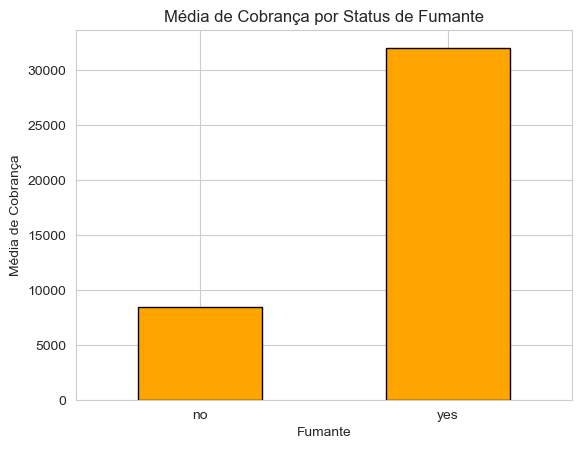

In [449]:
# Calcular a média de cobrança por status de fumante
average_charges_by_smoker = dataset.groupby('smoker')['charges'].mean()

# Exibir os resultados
print(average_charges_by_smoker)

# Opcional: Visualizar os resultados com um gráfico de barras
average_charges_by_smoker.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Média de Cobrança por Status de Fumante')
plt.xlabel('Fumante')
plt.ylabel('Média de Cobrança')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo X legíveis
plt.show()

O gráfico "Média de Cobrança por Status de Fumante" demonstra uma diferença drástica na média de cobrança entre fumantes e não fumantes. Indivíduos que não fumam (categoria "no") apresentam uma média de cobrança significativamente menor, situando-se por uns 8.500 - 9.000. Em contrapartida, os fumantes (categoria "yes") possuem uma média de cobrança extremamente elevada, ultrapassando os 30.000. Essa disparidade robusta indica que o hábito de fumar é o fator que mais impacta negativamente os valores de cobrança, levando a custos médios substancialmente maiores para essas pessoas.

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


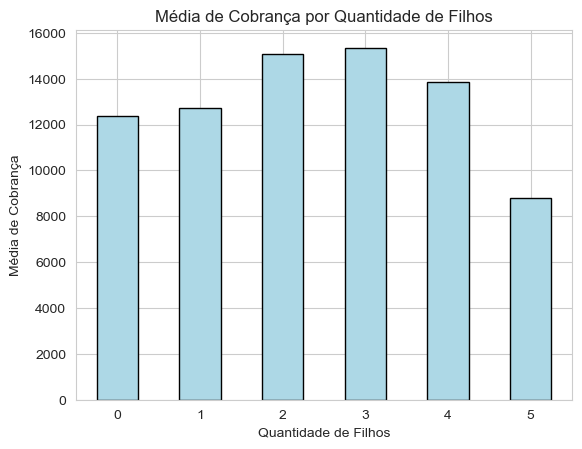

In [450]:
# Calcular a média de cobrança por quantidade de filhos
average_charges_by_children = dataset.groupby('children')['charges'].mean()

# Exibir os resultados
print(average_charges_by_children)

# Visualizar os resultados com um gráfico de barras
average_charges_by_children.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Média de Cobrança por Quantidade de Filhos')
plt.xlabel('Quantidade de Filhos')
plt.ylabel('Média de Cobrança')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo X legíveis
plt.show()

O gráfico "Média de Cobrança por Quantidade de Filhos" revela um padrão interessante. Inicialmente, a média de cobrança apresenta um aumento conforme o número de filhos cresce de 0 para 3. Indivíduos sem filhos (0) têm uma média de cobrança em torno de 12.500. Essa média sobe para aqueles com 1 filho (próximo a 13.000), e atinge seu pico para as categorias com 2 e 3 filhos, que mostram as maiores médias de cobrança, pouco acima de 15.000. No entanto, a partir de 4 filhos, a tendência se inverte, com a média de cobrança diminuindo para cerca de 14.000. Para 5 filhos, observa-se uma queda ainda mais acentuada, com a média caindo para menos de 9.000. Isso sugere que, embora ter alguns filhos (até 3) possa estar associado a cobranças médias mais altas, famílias maiores (4 ou 5 filhos) podem apresentar um comportamento diferente em relação aos custos.

### Análise da diminuição do valor de cobrança de acordo com a quantidade de filhos, hábitos de saúde e nível de obesidade

C:\Users\thiag\AppData\Local\Temp\ipykernel_41488\3533228456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='children', y='charges', data=dataset, palette='Blues')


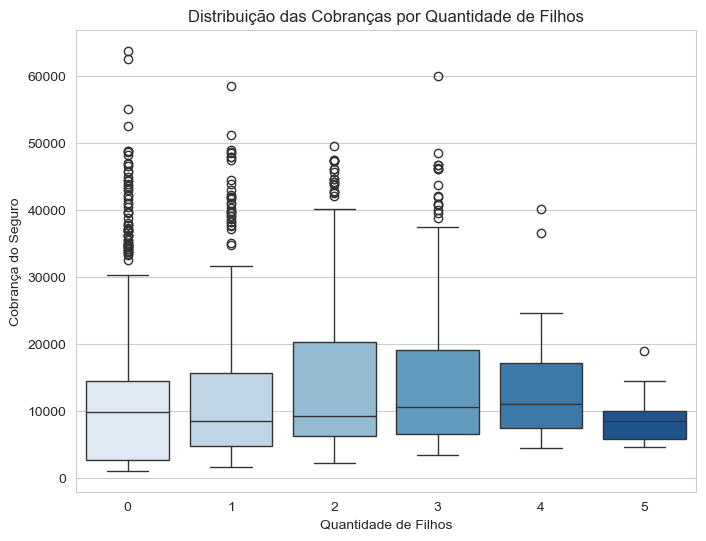

In [451]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='charges', data=dataset, palette='Blues')
plt.title('Distribuição das Cobranças por Quantidade de Filhos')
plt.xlabel('Quantidade de Filhos')
plt.ylabel('Cobrança do Seguro')
plt.show()

O box plot "Distribuição das Cobranças por Quantidade de Filhos" corrobora a tendência da média, mas fornece uma visão mais detalhada da dispersão dos dados.

As caixas (representando o quartil interquartil, Q1 a Q3) são mais alongadas e com muitos outliers (pontos individuais acima ou abaixo dos "bigodes") para os grupos de 0, 1 e 2 filhos, indicando uma maior variabilidade nas cobranças nesses grupos.

Para 3 filhos, a mediana ainda é alta, mas a dispersão dos dados é um pouco menor do que para 0, 1 e 2 filhos.

Para 4 e 5 filhos, não apenas a mediana é mais baixa, mas a dispersão (tamanho da caixa e dos bigodes) é consideravelmente menor e há menos outliers. Isso sugere que, embora o número de segurados nesses grupos seja menor, as cobranças tendem a ser mais previsíveis e mais baixas.

C:\Users\thiag\AppData\Local\Temp\ipykernel_41488\4264624228.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_by_bmi = dataset.groupby(['bmi_category', 'smoker']).size().unstack(fill_value=0)


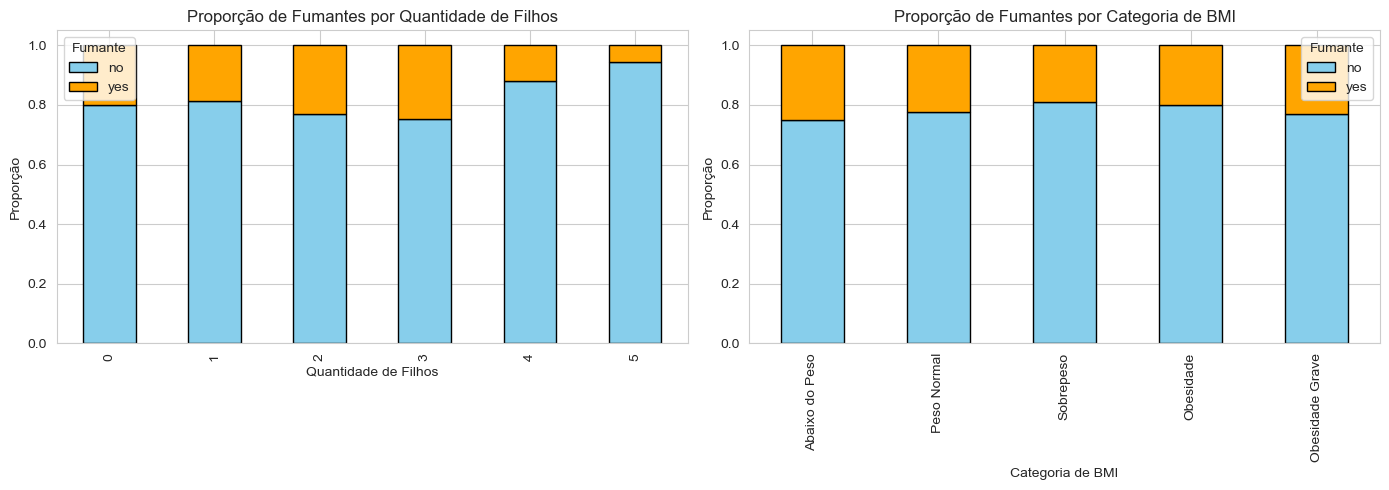

In [452]:
# Proporção de fumantes por quantidade de filhos e por categoria de BMI

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Proporção de fumantes por quantidade de filhos
smoker_by_children = dataset.groupby(['children', 'smoker']).size().unstack(fill_value=0)
smoker_by_children_prop = smoker_by_children.div(smoker_by_children.sum(axis=1), axis=0)
smoker_by_children_prop.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black', ax=axes[0])
axes[0].set_title('Proporção de Fumantes por Quantidade de Filhos')
axes[0].set_xlabel('Quantidade de Filhos')
axes[0].set_ylabel('Proporção')
axes[0].legend(title='Fumante')

# Gráfico 2: Proporção de fumantes por categoria de BMI
# Certifique-se de que a coluna 'bmi_category' existe
if 'bmi_category' not in dataset.columns:
    bmi_bins = [0, 18.5, 25, 30, 40, 100]
    bmi_labels = ['Abaixo do Peso', 'Peso Normal', 'Sobrepeso', 'Obesidade', 'Obesidade Grave']
    dataset['bmi_category'] = pd.cut(dataset['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

smoker_by_bmi = dataset.groupby(['bmi_category', 'smoker']).size().unstack(fill_value=0)
smoker_by_bmi_prop = smoker_by_bmi.div(smoker_by_bmi.sum(axis=1), axis=0)
smoker_by_bmi_prop.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black', ax=axes[1])
axes[1].set_title('Proporção de Fumantes por Categoria de BMI')
axes[1].set_xlabel('Categoria de BMI')
axes[1].set_ylabel('Proporção')
axes[1].legend(title='Fumante')

plt.tight_layout()
plt.show()

A imagem "Proporção de Fumantes por Quantidade de Filhos" mostra que a proporção de fumantes ("yes", em laranja) é relativamente consistente em todos os grupos de quantidade de filhos, talvez com uma ligeira diminuição para aqueles com 4 ou 5 filhos. Isso sugere que o número de filhos por si só não é um forte preditor de tabagismo.

A imagem "Proporção de Fumantes por Categoria de BMI" revela que a proporção de fumantes também é relativamente estável entre as diferentes categorias de IMC, com uma ligeira tendência de diminuir para "Obesidade Grave".

Embora o tabagismo seja um fator de risco importante para a saúde e, consequentemente, para o custo do seguro, essas proporções não mostram uma correlação clara com o número de filhos ou o IMC.

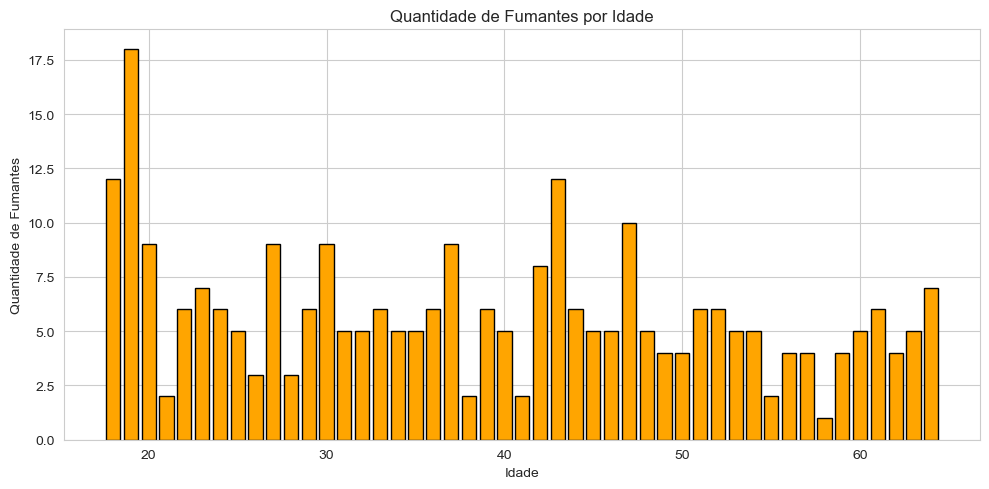

In [453]:
# Quantidade de fumantes por idade

smokers_by_age = dataset[dataset['smoker'] == 'yes']['age'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(smokers_by_age.index, smokers_by_age.values, color='orange', edgecolor='black')
plt.title('Quantidade de Fumantes por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Fumantes')
plt.tight_layout()
plt.show()

O gráfico de barras revela uma distribuição variável na quantidade de fumantes em diferentes faixas etárias, sem apresentar um padrão de crescimento ou declínio consistente com o aumento da idade.

No gráfico, observa-se alguns pontos:

- **Picos de quantidade:** Existem idades específicas com um número relativamente alto de fumantes no conjunto de dados, como as faixas próximas aos 19, 29, 41 e 46 anos.
- **Variação Significativa:** A quantidade de fumantes flutua consideravelmente entre idades adjacentes, indicando que a prevalência do tabagismo não é uniforme.
- **Presença em Todas as Idades:** Nota-se a presença de fumantes em praticamente todas as faixas etárias representadas, desde os mais jovens até os mais idosos, embora em quantidades diferentes.

C:\Users\thiag\AppData\Local\Temp\ipykernel_41488\1005202816.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bmi_category', y='age', data=dataset, palette='Set2')


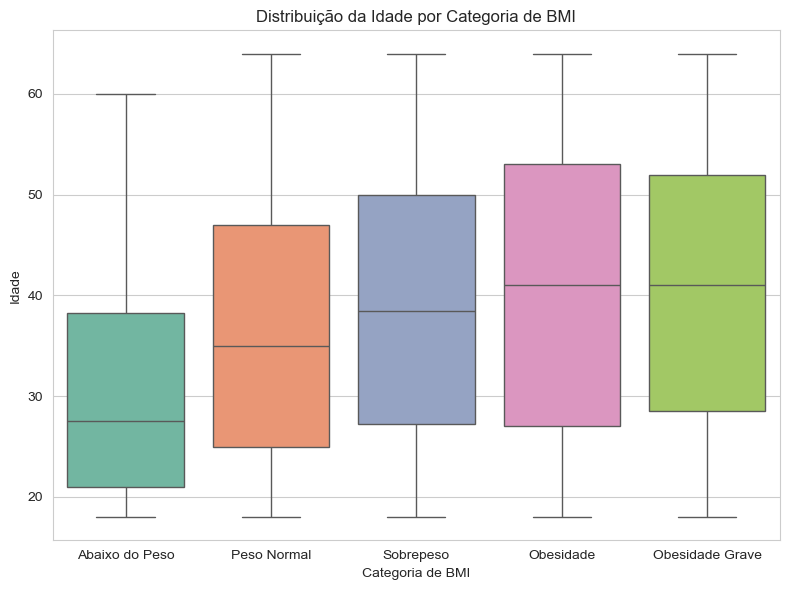

In [454]:
# Gráfico de boxplot relacionando idade e categoria de BMI

# Certifique-se de que a coluna 'bmi_category' existe
if 'bmi_category' not in dataset.columns:
    bmi_bins = [0, 18.5, 25, 30, 40, 100]
    bmi_labels = ['Abaixo do Peso', 'Peso Normal', 'Sobrepeso', 'Obesidade', 'Obesidade Grave']
    dataset['bmi_category'] = pd.cut(dataset['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi_category', y='age', data=dataset, palette='Set2')
plt.title('Distribuição da Idade por Categoria de BMI')
plt.xlabel('Categoria de BMI')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

O box plot "Distribuição da Idade por Categoria de BMI" mostra que, em média, as pessoas em categorias de IMC mais altas (Sobrepeso, Obesidade, Obesidade Grave) tendem a ser mais velhas do que as pessoas com "Abaixo do Peso" ou "Peso Normal". As medianas para "Sobrepeso", "Obesidade" e "Obesidade Grave" são visivelmente mais altas.

Essa correlação entre IMC e idade é crucial. Pessoas mais velhas já têm um risco aumentado de doenças, e se elas também se enquadram em categorias de IMC de risco, isso pode amplificar o custo do seguro. Isso sugere que a categoria de IMC, especialmente para as mais altas, é um fator importante a ser considerado na precificação, em conjunto com a idade.

sex     smoker
female  no         8762.297300
        yes       30678.996276
male    no         8099.700161
        yes       33042.005975
Name: charges, dtype: float64


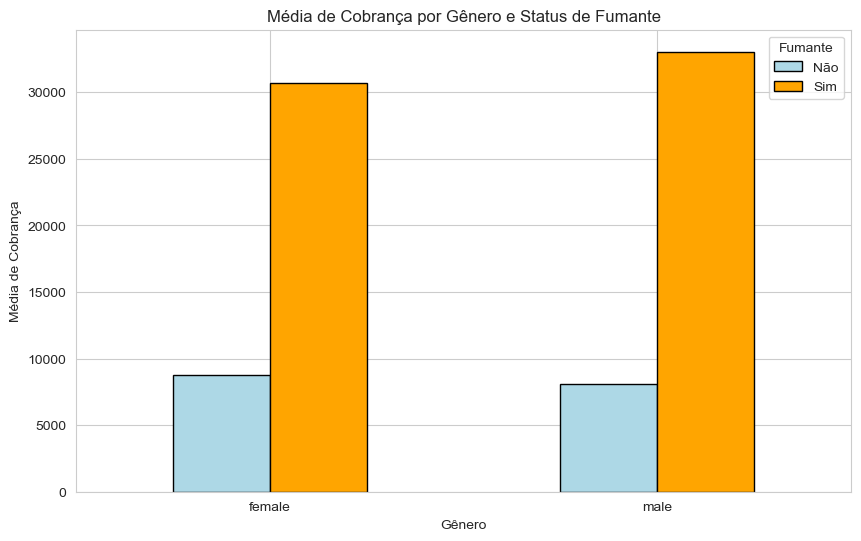

In [455]:
# Calcular a média de cobrança por combinação de gênero e fumantes
average_charges_by_gender_smoker = dataset.groupby(['sex', 'smoker'])['charges'].mean()

# Exibir os resultados
print(average_charges_by_gender_smoker)

# Opcional: Visualizar os resultados com um gráfico de barras
average_charges_by_gender_smoker.unstack().plot(kind='bar', figsize=(10, 6), color=['lightblue', 'orange'], edgecolor='black')
plt.title('Média de Cobrança por Gênero e Status de Fumante')
plt.xlabel('Gênero')
plt.ylabel('Média de Cobrança')
plt.legend(title='Fumante', labels=['Não', 'Sim'])
plt.xticks(rotation=0)  # Mantém os rótulos do eixo X legíveis
plt.show()

A análise da média de cobrança revela que o status de fumante é um fator que impacta significativamente no valor cobrado, independentemente do gênero. Tanto para o gênero feminino quanto para o masculino, indivíduos fumantes apresentam uma média de cobrança substancialmente maior em comparação com os não fumantes.

Embora haja uma pequena diferença na média de cobrança entre os gêneros (com homens não fumantes tendo uma média ligeiramente inferior a mulheres não fumantes, e homens fumantes uma média ligeiramente superior a mulheres fumantes), a discrepância entre fumantes e não fumantes é muito mais acentuada. Isso sugere que, na precificação do seguro, o risco associado ao tabagismo é um driver de custo muito mais potente do que as diferenças de gênero por si só.

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


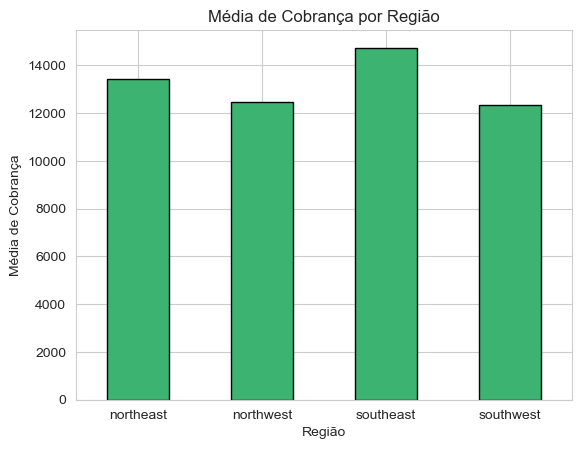

In [456]:
# Calcular a média de cobrança por região
average_charges_by_region = dataset.groupby('region')['charges'].mean()

# Exibir os resultados
print(average_charges_by_region)

# Visualizar os resultados com um gráfico de barras
average_charges_by_region.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Média de Cobrança por Região')
plt.xlabel('Região')
plt.ylabel('Média de Cobrança')
plt.xticks(rotation=0)
plt.show()

smoker              no           yes
region                              
northeast  9165.531672  29673.536473
northwest  8582.467101  30192.003182
southeast  8032.216309  34844.996824
southwest  8019.284513  32269.063494

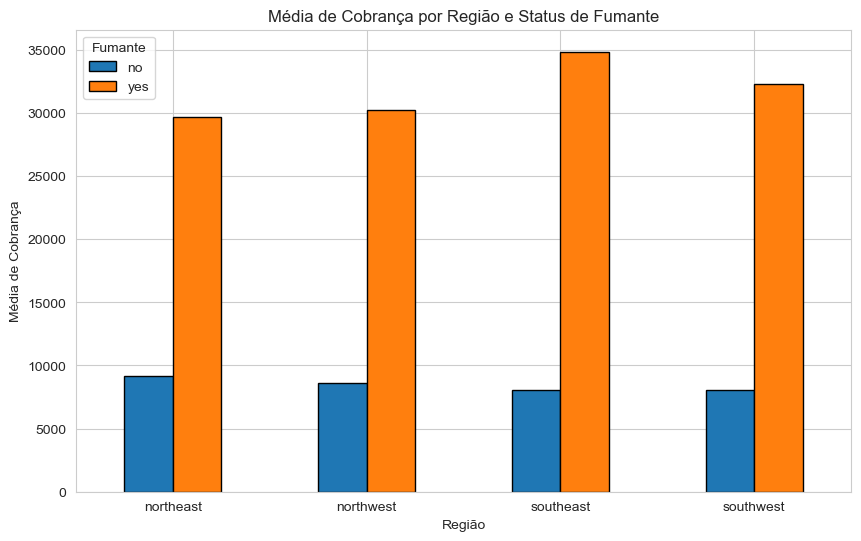

In [457]:
# Calcular a média de cobrança por região e status de fumante
average_charges_by_region_smoker = dataset.groupby(['region', 'smoker'])['charges'].mean().unstack()

# Exibir os resultados
print(average_charges_by_region_smoker)

# Visualizar os resultados com um gráfico de barras agrupadas
average_charges_by_region_smoker.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Média de Cobrança por Região e Status de Fumante')
plt.xlabel('Região')
plt.ylabel('Média de Cobrança')
plt.legend(title='Fumante')
plt.xticks(rotation=0)
plt.show()

A análise combinada dos dois gráficos revela que, embora a região geográfica tenha uma influência na média de cobrança de seguros, o status de fumante emerge como o fator mais significativo e dominante na determinação dos custos de seguro.

O primeiro gráfico ("Média de Cobrança por Região") inicialmente sugere que há variações regionais nos custos, com a região "southeast" apresentando a média mais alta e a "northwest" a mais baixa. No entanto, o segundo gráfico ("Média de Cobrança por Região e Status de Fumante") desagrega essa informação e fornece um entendimento crucial. Ele demonstra que, em todas as regiões, a média de cobrança para fumantes é exponencialmente maior do que para não fumantes. A disparidade entre os custos para fumantes e não fumantes é consistentemente muito superior às diferenças observadas entre as próprias regiões.

Isso significa que, enquanto uma região como o "southeast" pode ter uma média de cobrança geral mais alta (como visto no primeiro gráfico), essa elevação é majoritariamente impulsionada pelos custos significativamente maiores associados aos segurados fumantes residentes nessa região.

## Transformação as colunas categoricas em numéricas aplicando o LabelEncoder e o OneHotEncoder

In [458]:
# Remover as colunas de categorias utilizadas para análise
dataset_transformed = dataset.drop(columns=['age_category', 'bmi_category']).copy()

# Aplicar label ecoding nas colunas sex e smoker
label_encoder = LabelEncoder()
dataset_transformed['sex_encoded'] = label_encoder.fit_transform(dataset_transformed['sex'])
dataset_transformed['smoker_encoded'] = label_encoder.fit_transform(dataset_transformed['smoker'])

dataset_transformed.head()


,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [459]:
# Aplicar o OneHotEncoder na coluna region
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
region_values = dataset_transformed[['region']]

region_encoded = onehot_encoder.fit_transform(region_values)
region_encoded_columns = onehot_encoder.get_feature_names_out(['region'])
region_encoded_df = pd.DataFrame(region_encoded, columns=region_encoded_columns, index=dataset_transformed.index)

dataset_transformed = pd.concat([dataset_transformed, region_encoded_df], axis=1)
dataset_transformed.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1.0,0.0,0.0


In [460]:
# Remover as colunas originais categoricas
# remover a coluna original 'region'
dataset_transformed = dataset_transformed.drop(columns=['region', 'sex', 'smoker'])
dataset_transformed.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1,0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1,0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1,0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1,0,1.0,0.0,0.0


## Mapa de calor para avaliar o nível da influência que paramêtros como consumo de cigarro, IMC e idade influenciam no valor final cobrado pela seguradora

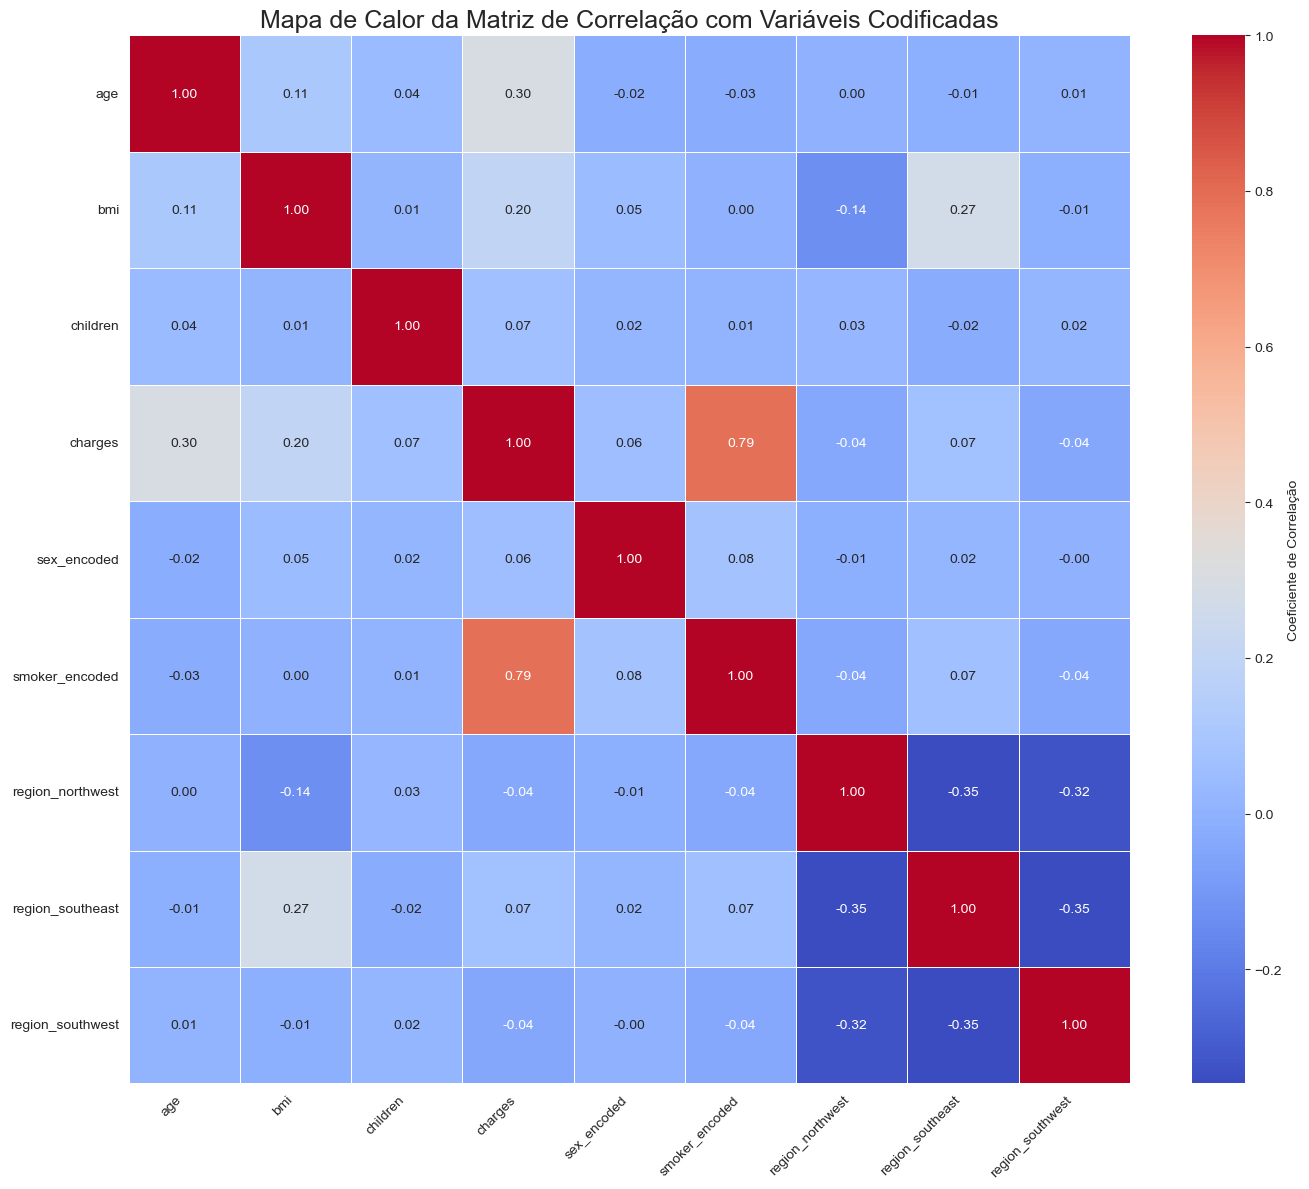


Correlação das variáveis com a Cobrança de Seguro ('charges'):
charges             1.000000
smoker_encoded      0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_encoded         0.058044
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64


In [461]:
# Calcular a matriz de correlação do dataset transformado
correlation_matrix = dataset_transformed.corr()

# Definir o tamanho da figura para o mapa de calor
plt.figure(figsize=(14, 12)) # Aumentei um pouco o tamanho para mais colunas

# Criar o mapa de calor
sns.heatmap(
    correlation_matrix,
    annot=True,      # Mostra os valores de correlação nas células
    cmap='coolwarm', # Mapa de cores (coolwarm é bom para correlações positivas e negativas)
    fmt=".2f",       # Formato dos números (duas casas decimais)
    linewidths=.5,   # Adiciona linhas entre as células para melhor visualização
    cbar_kws={'label': 'Coeficiente de Correlação'} # Adiciona um rótulo à barra de cores
)

plt.title('Mapa de Calor da Matriz de Correlação com Variáveis Codificadas', fontsize=18)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.yticks(rotation=0) # Mantém os rótulos do eixo Y na horizontal
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

# Opcional: Para ver as correlações com seu target 'charges' de forma ordenada
print("\nCorrelação das variáveis com a Cobrança de Seguro ('charges'):")
print(correlation_matrix['charges'].sort_values(ascending=False))

Com o mapa de calor, é possível inferir que:

**1. O status de fumante é o fator mais dominante**
    
- A correlação mais forte e positiva com charges é de smoker_encoded (0.79). Isso confirma visualmente o que os gráficos de barras já mostravam: ser fumante está associado a uma cobrança de seguro significativamente mais alta. Este é, portanto, o preditor mais influente na base de dados.

**2. Idade e IMC têm correlação positiva moderada**
    
- `age` apresenta uma correlação positiva moderada com charges (0.30). Isso sugere que, à medida que a idade aumenta, a cobrança de seguro tende a aumentar, o que é esperado devido ao risco crescente de saúde com a idade.
    
- bmi (Índice de Massa Corporal) também mostra uma correlação positiva moderada com charges (0.20). Embora menor que a idade, indica que pessoas com IMC mais elevado tendem a ter custos de seguro maiores, possivelmente devido a riscos de saúde associados ao peso.

**3. Variáveis Categóricas (Gênero e Região) Têm Influência Limitada ou Contextual:**

- Gênero (sex_encoded): A correlação com charges é quase nula (0.06). Isso alinha-se com o primeiro gráfico de barras ("Média de Cobrança por Gênero e Status de Fumante"), que mostrava que, uma vez considerado o status de fumante, a diferença de cobrança entre gêneros é mínima. O mapa de calor quantifica essa irrelevância direta.
    
- Regiões (region_northeast, region_northwest, region_southeast, region_southwest):
    
    - As correlações diretas entre as variáveis de região e charges são muito baixas (variando de 0.01 a 0.07 e −0.04).
    
    - É crucial notar a correlação entre region_southeast e bmi (0.27). Isso é interessante, pois indica que a região Sudeste tem uma correlação positiva moderada com um IMC mais elevado. Dado que bmi tem uma correlação positiva com charges, isso pode explicar indiretamente por que a média de cobrança geral no Sudeste era mais alta no gráfico "Média de Cobrança por Região", além do fator fumante já evidenciado. Pessoas no Sudeste tendem a ter um IMC maior, o que contribui para custos mais altos.
    
    - O gráfico de barras "Média de Cobrança por Região e Status de Fumante" já havia demonstrado que a influência da região é secundária e se manifesta principalmente através da combinação com o status de fumante. O mapa de calor complementa isso mostrando que a correlação direta é fraca, mas pode haver interações ou influências indiretas (como com o IMC no Sudeste).

**4. Número de Filhos (children):**
- A correlação com charges é muito baixa (0.07), indicando que o número de filhos tem pouca ou nenhuma influência linear direta na cobrança de seguro neste conjunto de dados.

# Treinamento dos modelo predidtivo

In [462]:
original_transformed_dataset = dataset_transformed.copy()
dataset_transformed.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1,0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1,0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1,0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1,0,1.0,0.0,0.0


## Regressão Linear

### Treino do modelo sem tratativa de dados

In [463]:
x_linear_regression = dataset_transformed.drop(columns=['charges'])
y_linear_regression = dataset_transformed['charges']

x_train_linear_regression, x_test_linear_regression, y_train_linear_regression, y_test_linear_regression = train_test_split(x, y, test_size=0.2, random_state=42)
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train_linear_regression, y_train_linear_regression)

## Avaliar o modelo
y_pred_linear_regression = linear_regression_model.predict(x_test_linear_regression)

mse = mean_squared_error(y_test_linear_regression, y_pred_linear_regression)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_linear_regression, y_pred_linear_regression)
mape = mean_absolute_percentage_error(y_test_linear_regression, y_pred_linear_regression)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"MAPE: {mape}")

MSE: 35478020.67523556
RMSE: 5956.3428943635845
R² Score: 0.8069287081198014
MAPE: 0.4139675637138064


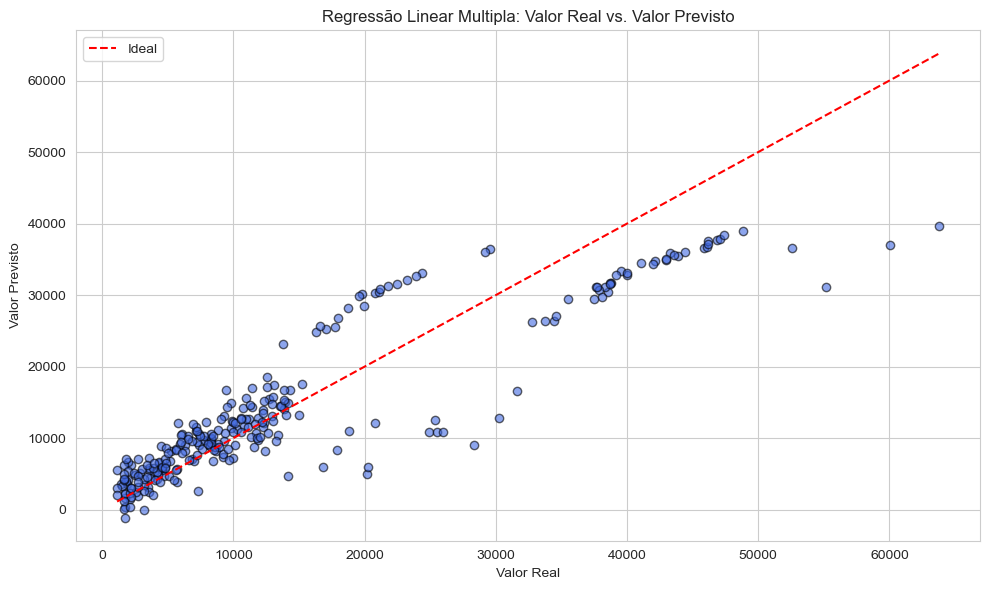

In [464]:
# Gráfico de comparação
plt.figure(figsize=(10, 6))
plt.scatter(y_test_linear_regression, y_pred_linear_regression, alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([y_test_linear_regression.min(), y_test_linear_regression.max()], [y_test_linear_regression.min(), y_test_linear_regression.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Regressão Linear Multipla: Valor Real vs. Valor Previsto')
plt.legend()
plt.tight_layout()
plt.show()

## Polinominal

In [ ]:
#Regressão Linear,

linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

#Regressão Polinomial (grau 2),
x_linear_regression = dataset_transformed.drop(columns=['charges'])
y_linear_regression = dataset_transformed['charges']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

#Plot,
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Dados reais', alpha=0.6)
plt.plot(X, y_pred_linear, color='red', label='Regressão Linear')
plt.plot(X, y_pred_poly, color='blue', label='Regressão Polinomial (grau 2)')
plt.title('Comparação: Regressão Linear vs Polinomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Métricas,
print("R² Linear:", r2_score(y, y_pred_linear))
print("R² Polinomial:", r2_score(y, y_pred_poly))

## Arvore de regressão

### Sem análise de importância de features

In [465]:
from sklearn.tree import DecisionTreeRegressor

X_regression_tree = dataset_transformed.drop(columns=['charges'])
y_regression_tree = dataset_transformed['charges']

# 4. Dividir os dados em treino e teste
X_train_regression_tree, X_test_regression_tree, y_train_regression_tree, y_test_regression_tree = train_test_split(X_regression_tree, y_regression_tree, test_size=0.2, random_state=42)

# 5. Criar o modelo de árvore de regressão
tree_model = DecisionTreeRegressor(max_depth=20, max_leaf_nodes=40, random_state=42)

# 6. Treinar o modelo
tree_model.fit(X_train_regression_tree, y_train_regression_tree)

# 7. Fazer previsões
y_pred = tree_model.predict(X_test_regression_tree)

# 8. Avaliar o modelo
mse = mean_squared_error(y_test_regression_tree, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_regression_tree, y_pred)
mape = mean_absolute_percentage_error(y_test_regression_tree, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"MAPE: {mape}")

MSE: 22667995.362153914
RMSE: 4761.091824587498
R² Score: 0.8766408309818612
MAPE: 0.29760282783506936


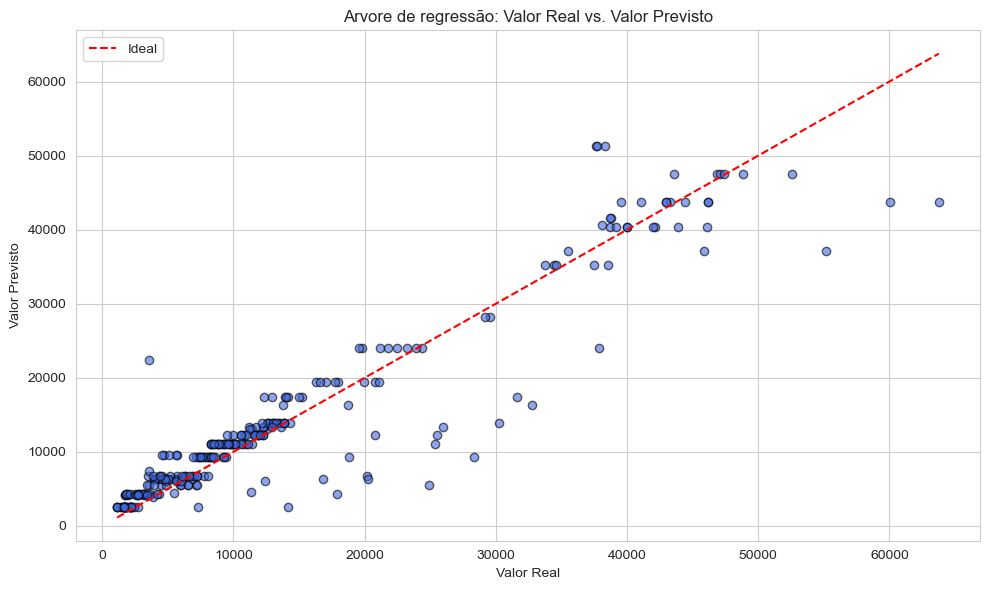

In [466]:
# Gráfico de comparação
plt.figure(figsize=(10, 6))
plt.scatter(y_test_regression_tree, y_pred, alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([y_test_regression_tree.min(), y_test_regression_tree.max()], [y_test_regression_tree.min(), y_test_regression_tree.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Arvore de regressão: Valor Real vs. Valor Previsto')
plt.legend()
plt.tight_layout()
plt.show()

## Utilizando apenas as variáveis com maior importância

In [467]:
from sklearn.feature_selection import SelectKBest, f_regression

X_regression_tree_greater_importance_variables = dataset_transformed.drop(columns=['charges'])
y_regression_tree_greater_importance_variables = dataset_transformed['charges']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(dataset_transformed, y_regression_tree_greater_importance_variables)

# Ver os scores
feature_scores = pd.DataFrame({
    'Feature': dataset_transformed.columns,
    'F-Score': selector.scores_,
    'p-Value': selector.pvalues_
}).sort_values(by='F-Score', ascending=False)

print(feature_scores)

            Feature       F-Score        p-Value
3           charges  1.002051e+18   0.000000e+00
5    smoker_encoded  2.175737e+03  1.406722e-282
0               age  1.304030e+02   6.975749e-29
1               bmi  5.470271e+01   2.468040e-13
7  region_southeast  7.266644e+00   7.112934e-03
2          children  6.090326e+00   1.371703e-02
4       sex_encoded  4.513038e+00   3.382079e-02
8  region_southwest  2.546984e+00   1.107417e-01
6  region_northwest  2.001859e+00   1.573396e-01


In [468]:
new_x = dataset_transformed.drop(columns=['region_southeast', 'children', 'sex_encoded', 'region_southwest', 'region_northwest'])

x_train_regression_tree_greater_importance_variables, x_test_regression_tree_greater_importance_variables, y_train_regression_tree_greater_importance_variables, y_test_regression_tree_greater_importance_variables = train_test_split(new_x, y_regression_tree_greater_importance_variables, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(max_depth=12, max_leaf_nodes=15, random_state=42)
tree.fit(x_train_regression_tree_greater_importance_variables, y_train_regression_tree_greater_importance_variables)

y_train_pred_regression_tree_greater_importance_variables = tree.predict(x_train_regression_tree_greater_importance_variables)
y_test_pred_regression_tree_greater_importance_variables = tree.predict(x_test_regression_tree_greater_importance_variables)

mse_train = mean_squared_error(y_train_regression_tree_greater_importance_variables, y_train_pred_regression_tree_greater_importance_variables)
r2_train = r2_score(y_train_regression_tree_greater_importance_variables, y_train_pred_regression_tree_greater_importance_variables)

print(f"MSE Treino: {mse_train}")
print(f"R² Treino: {r2_train}")

print(f"------"*4)

mse = mean_squared_error(y_test_regression_tree_greater_importance_variables, y_test_pred_regression_tree_greater_importance_variables)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_regression_tree_greater_importance_variables, y_test_pred_regression_tree_greater_importance_variables)
mape = mean_absolute_percentage_error(y_test_regression_tree_greater_importance_variables, y_test_pred_regression_tree_greater_importance_variables)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"MAPE: {mape}")

MSE Treino: 733368.2244526637
R² Treino: 0.9946436110622011
------------------------
MSE: 1107506.2293556212
RMSE: 1052.3812186444707
R² Score: 0.9939729541164535
MAPE: 0.09262085823832757


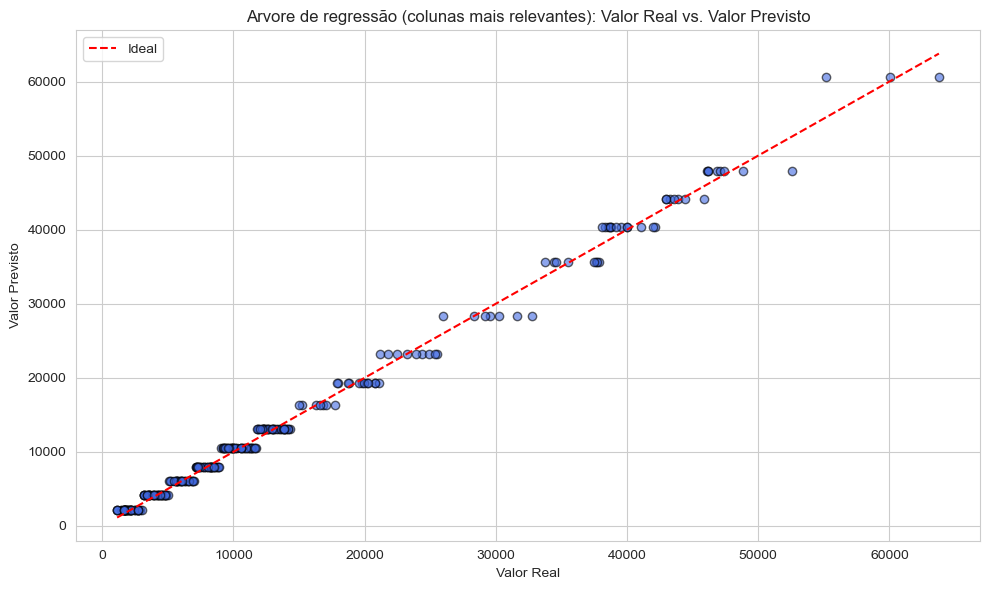

In [469]:
# Gráfico de comparação
plt.figure(figsize=(10, 6))
plt.scatter(y_test_regression_tree_greater_importance_variables, y_test_pred_regression_tree_greater_importance_variables, alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([y_test_regression_tree_greater_importance_variables.min(), y_test_regression_tree_greater_importance_variables.max()], [y_test_regression_tree_greater_importance_variables.min(), y_test_regression_tree_greater_importance_variables.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Arvore de regressão (colunas mais relevantes): Valor Real vs. Valor Previsto')
plt.legend()
plt.tight_layout()
plt.show()